In [7]:
import numpy as np
import matplotlib.pyplot as plt

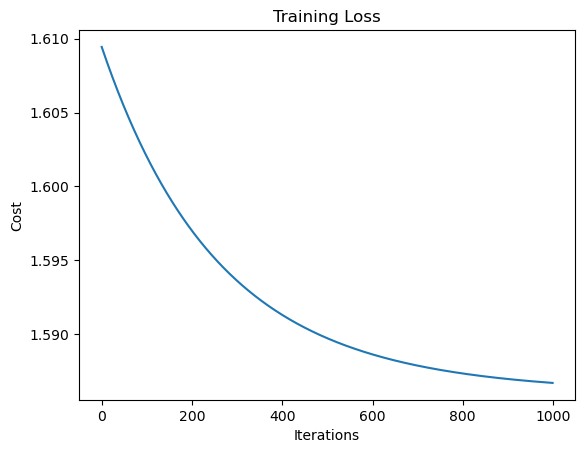

In [8]:
# Initialize the neural network structure
input_size = 10  # Assume 10 input features
hidden_size = 5  # Each layer has 5 neurons
output_size = 5  # 5 output classes
learning_rate = 0.01
iterations = 1000
num_samples = 100  # Fixed number of training examples

# Fix dataset (X and Y)
np.random.seed(42)
X_train = np.random.randn(input_size, num_samples)  # Fixed dataset
Y_train = np.eye(output_size)[np.random.choice(output_size, num_samples)].T  # Fixed labels (one-hot encoding)

# Initialize weights and biases
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(hidden_size, hidden_size) * 0.01
b2 = np.zeros((hidden_size, 1))
W3 = np.random.randn(hidden_size, hidden_size) * 0.01
b3 = np.zeros((hidden_size, 1))
W4 = np.random.randn(output_size, hidden_size) * 0.01
b4 = np.zeros((output_size, 1))

# Activation functions
def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

losses = []


for i in range(iterations):
    
    # z = w.x +b
    # A = relu(z)
    
    # Forward propagation 
    Z1 = np.dot(W1, X_train) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = relu(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = softmax(Z4)  

    # loss = - sum(y*log(A))
    
    # Compute loss (cross-entropy)
    loss = -np.sum(Y_train * np.log(A4 + 1e-8)) / num_samples
    losses.append(loss)
    
    # Backpropagation
    
    # z4 = w4.A3 +b4
    # dz4/dw4 = A3
    # dz4/db4 =1
    
    # dz4 = A4-y   ===> error
    # dw4 = dz4.A3
    # db4 = sum(dz4)
    dZ4 = A4 - Y_train
    dW4 = np.dot(dZ4, A3.T) / num_samples
    db4 = np.sum(dZ4, axis=1, keepdims=True) / num_samples

    # z4 = w4.A3 +b
    # dz4/dA3 = w4
    # dA3 = w4.dz4
    # A3 = Relu(z3)
    # dz3 = dA3
    
    # z3 = w3.A2 +b3
    # dz3/dw3 = A2
    # dz3/db3 = 1
    # dw3 = dz3.A2
    # db3 = sum(dz3)
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * (A3 > 0)
    dW3 = np.dot(dZ3, A2.T) / num_samples
    db3 = np.sum(dZ3, axis=1, keepdims=True) / num_samples

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * (A2 > 0)
    dW2 = np.dot(dZ2, A1.T) / num_samples
    db2 = np.sum(dZ2, axis=1, keepdims=True) / num_samples

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (A1 > 0)
    dW1 = np.dot(dZ1, X_train.T) / num_samples
    db1 = np.sum(dZ1, axis=1, keepdims=True) / num_samples

    # w = w - lr*dw
    # Gradient Descent Update
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W4 -= learning_rate * dW4
    b4 -= learning_rate * db4

# Plot cost vs. iterations
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Training Loss")
plt.show()
